In [ ]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from matplotlib.animation import FuncAnimation
from IPython import display
import matplotlib.animation as animation

In [ ]:
#Ввод начальных данных
T = 4
n = 160
h = 0.02
sigma = 0.75
z = 2.5
N = int(T / h)
N1 = N
N2 = int(T / (h / 2))
print(f"N1 = {N1}")
print(f"N2 = {N2}")

N1 = 200
N2 = 400


In [ ]:
# Формирование двумерного винеровского процесса

W1 = []
W2 = []
XI = []
for i in range(n):
  w11 = np.zeros(N1 + 1)
  w12 = np.zeros(N1 + 1)
  w21 = np.zeros(N2 + 1)
  w22 = np.zeros(N2 + 1)
  xi1 = np.random.normal(0, sigma*np.sqrt(h/2), 2*N1)
  xi2 = np.random.normal(0, sigma*np.sqrt(h/2), 2*N1) 
  XI.append((xi1, xi2))
  for j in range(0, N1):
    w11[j + 1] = w11[j] + xi1[2*j] + xi1[2*j + 1]
    w12[j + 1] = w12[j] + xi2[2*j] + xi2[2*j + 1]
  for j in range(0, N2):
    w21[j + 1] = w21[j] + xi1[j]
    w22[j + 1] = w22[j] + xi2[j]
  
  W1.append((w11, w12))
  W2.append((w21, w22))

In [ ]:
print(f"{XI[0][0][0]}, {XI[0][0][1]}, {XI[0][0][2]}, ..., {XI[0][0][-3]}, {XI[0][0][-2]}, {XI[0][0][-1]}")
print(f"{XI[0][1][0]}, {XI[0][1][1]}, {XI[0][1][2]}, ..., {XI[0][1][-3]}, {XI[0][1][-2]}, {XI[0][1][-1]}")
print(f"{W1[0][0][0]}, {W1[0][0][1]}, {W1[0][0][2]}, ..., {W1[0][0][-3]}, {W1[0][0][-2]}, {W1[0][0][-1]}")
print(f"{W1[0][1][0]}, {W1[0][1][1]}, {W1[0][1][2]}, ..., {W1[0][1][-3]}, {W1[0][1][-2]}, {W1[0][1][-1]}")

-0.00872113081877027, -0.06267461987718129, -0.030047691681203297, ..., 0.008601067868190464, -0.02233912431134127, -0.05578093577366582
0.019628932773607784, -0.006254580910578043, -0.12665936741001982, ..., 0.08408875442555576, 0.15636279504262704, 0.06996774534319124
0.0, -0.07139575069595155, -0.08469073181936823, ..., -1.1145276644969813, -1.027089781774933, -1.10520984185994
0.0, 0.013374351863029741, -0.07613305453201322, ..., 0.42452541893449053, 0.5531460879529945, 0.7794766283388128


In [ ]:
print(f"{XI[0][0][0]}, {XI[0][0][1]}, {XI[0][0][2]}, ..., {XI[0][0][-3]}, {XI[0][0][-2]}, {XI[0][0][-1]}")
print(f"{XI[0][1][0]}, {XI[0][1][1]}, {XI[0][1][2]}, ..., {XI[0][1][-3]}, {XI[0][1][-2]}, {XI[0][1][-1]}")
print(f"{W2[0][0][0]}, {W2[0][0][1]}, {W2[0][0][2]}, ..., {W2[0][0][-3]}, {W2[0][0][-2]}, {W2[0][0][-1]}")
print(f"{W2[0][1][0]}, {W2[0][1][1]}, {W2[0][1][2]}, ..., {W2[0][1][-3]}, {W2[0][1][-2]}, {W2[0][1][-1]}")

-0.00872113081877027, -0.06267461987718129, -0.030047691681203297, ..., 0.008601067868190464, -0.02233912431134127, -0.05578093577366582
0.019628932773607784, -0.006254580910578043, -0.12665936741001982, ..., 0.08408875442555576, 0.15636279504262704, 0.06996774534319124
0.0, -0.00872113081877027, -0.07139575069595155, ..., -1.027089781774933, -1.0494289060862743, -1.10520984185994
0.0, 0.019628932773607784, 0.013374351863029741, ..., 0.5531460879529945, 0.7095088829956215, 0.7794766283388128


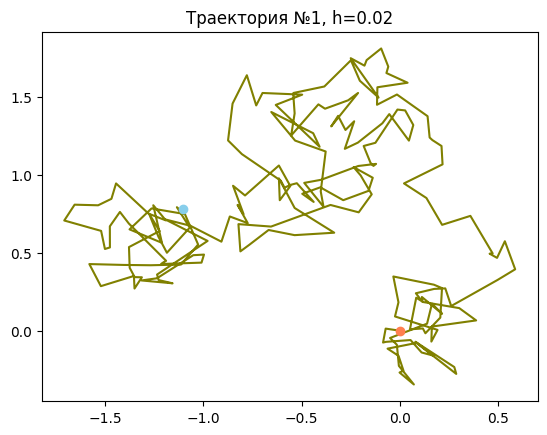

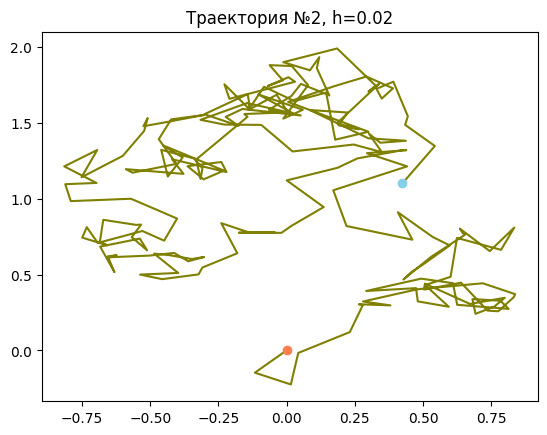

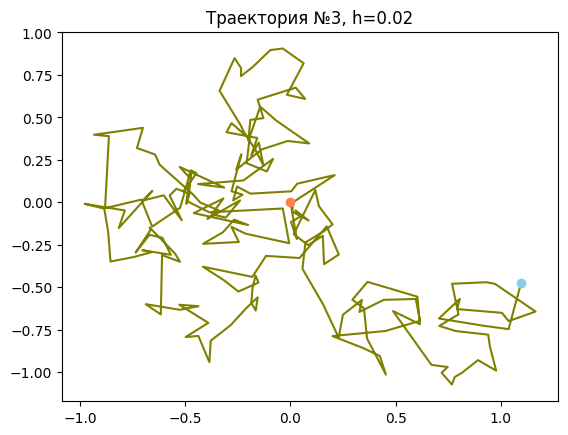

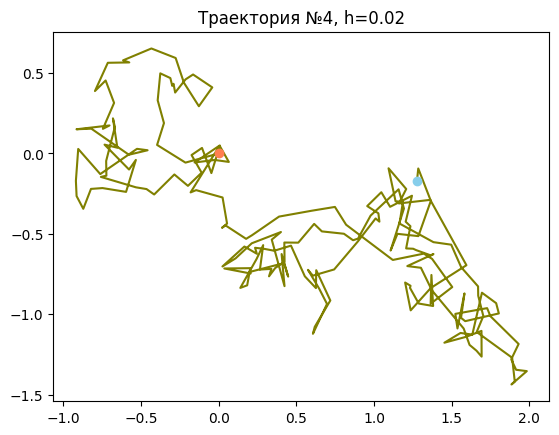

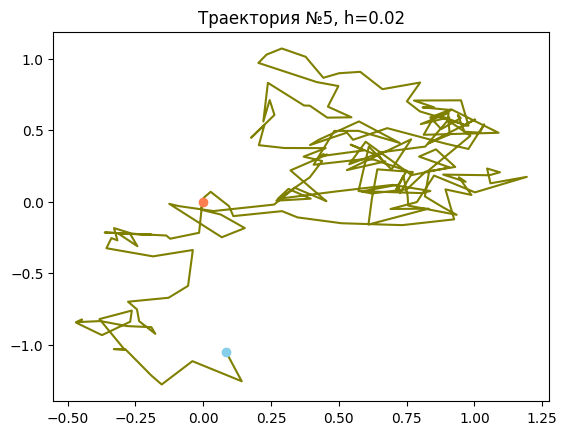

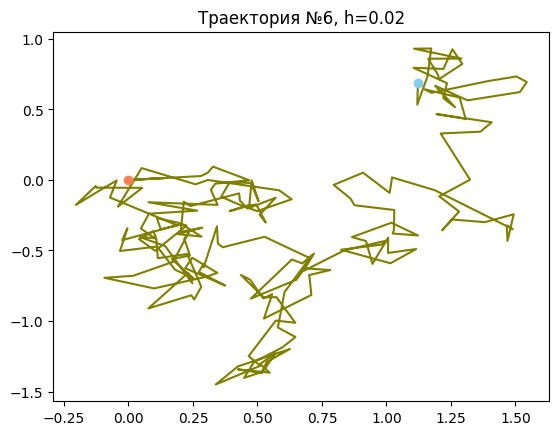

In [ ]:
# Визуализация траекторий
def viz(W, num, col = 'olive'):
  plt.scatter(W[num - 1][0][0], W[num - 1][1][0], zorder=2, color = "coral")
  plt.scatter(W[num - 1][0][-1], W[num - 1][1][-1], zorder=2, color = "skyblue")
  plt.plot(W[num - 1][0], W[num - 1][1], color=col, zorder=1)
  plt.title(f"Траектория №{num}, h={h}")
  plt.show()
viz(W1, 1)
viz(W1, 2)
viz(W1, 3)
viz(W1, 4)
viz(W1, 5)
viz(W1, 6)

In [ ]:
# Вычисление характеристик двумерного винеровского процесса

# Вариации компонент
VAR = []
for i in range(n):
  var1 = 0  
  var2 = 0
  for j in range(N1):
        var1 += abs(W1[i][0][j + 1] - W1[i][0][j])
        var2 += abs(W1[i][1][j + 1] - W1[i][1][j])
  VAR.append((var1, var2))

print("Вариации компонент для каждой траектории: ")

for i in range(3):
    print(f"({VAR[i][0]}, {VAR[i][1]})")
print("...")
for i in range(len(VAR) - 1, len(VAR) - 4, -1):
    print(f"({VAR[i][0]}, {VAR[i][1]})")

# Среднее значение вариации
sum_x = 0
sum_y = 0
for i in range(len(VAR)):
  sum_x += VAR[i][0]
  sum_y += VAR[i][1]
print()
print("Среднее значение вариации: ")
print(f"({sum_x / len(VAR)}, {sum_y / len(VAR)})")

# Суммы квадратов приращений компонент
sqVAR = []
for i in range(n):
  sqvar1 = 0
  sqvar2 = 0
  for j in range(N1):
        sqvar1 += abs(W1[i][0][j + 1] - W1[i][0][j]) ** 2
        sqvar2 += abs(W1[i][1][j + 1] - W1[i][1][j]) ** 2
  sqVAR.append((sqvar1, sqvar2))
print()
print("Суммы квадратов приращений компонент: ")

for i in range(3):
    print(f"({sqVAR[i][0]}, {sqVAR[i][1]})")
print("...")
for i in range(len(sqVAR) - 1, len(sqVAR) - 4, -1):
    print(f"({sqVAR[i][0]}, {sqVAR[i][1]})")

# Среднее значение этих сумм
sum_x = 0
sum_y = 0
for i in range(len(sqVAR)):
  sum_x += sqVAR[i][0]
  sum_y += sqVAR[i][1]
print()
print("Среднее значение этих сумм: ")
print(f"({sum_x / len(sqVAR)}, {sum_y / len(sqVAR)})")

Вариации компонент для каждой траектории: 
(16.480842854378558, 18.07283192316512)
(18.25502849713105, 16.874164310226085)
(15.716921184096256, 17.122195755974843)
...
(14.67485779614085, 15.360937932098583)
(18.634699157955854, 18.467620539093232)
(16.09870898072948, 18.75021514789658)

Среднее значение вариации: 
(16.88255995530051, 16.872158207129807)

Суммы квадратов приращений компонент: 
(2.2015097888145863, 2.4531890761370443)
(2.4466192706844283, 2.213489352347111)
(2.002469602809849, 2.3179395861452363)
...
(1.8284755489953197, 1.8219369007613964)
(2.63780547944678, 2.464516016222171)
(2.1396411286177464, 2.650763781903494)

Среднее значение этих сумм: 
(2.2347611615668592, 2.2370045566394876)


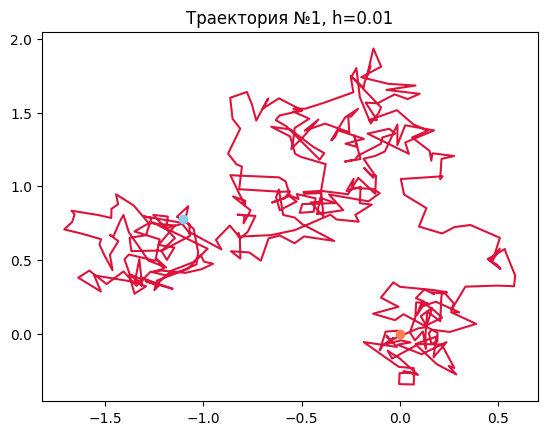

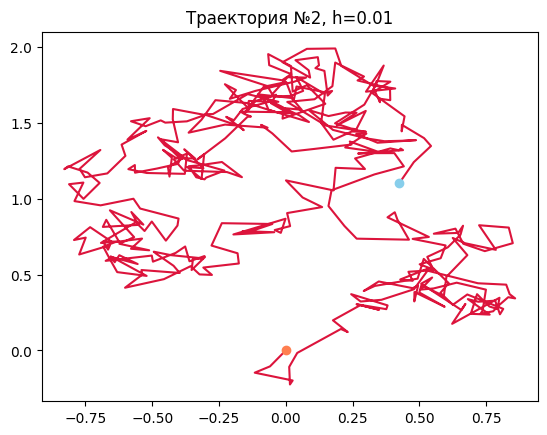

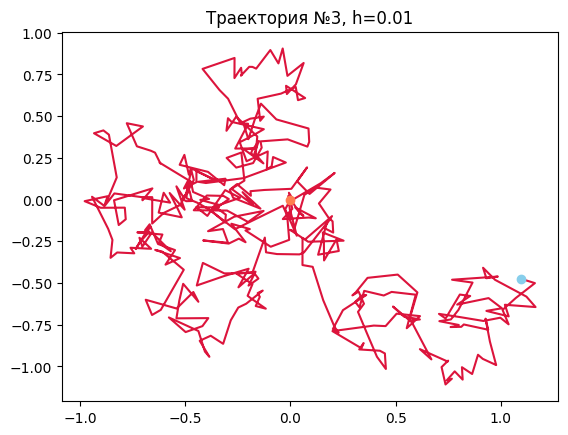

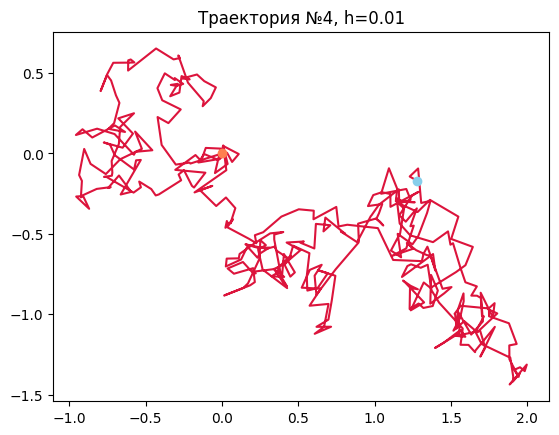

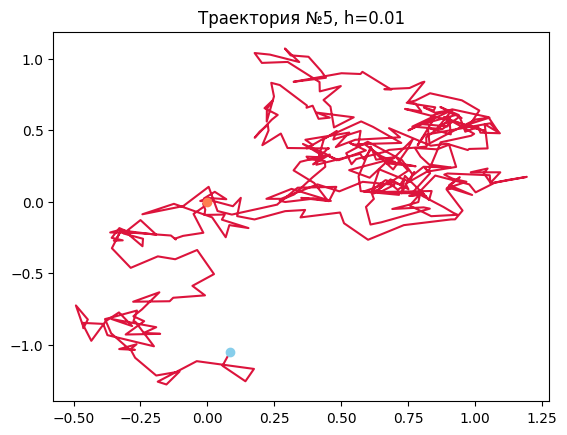

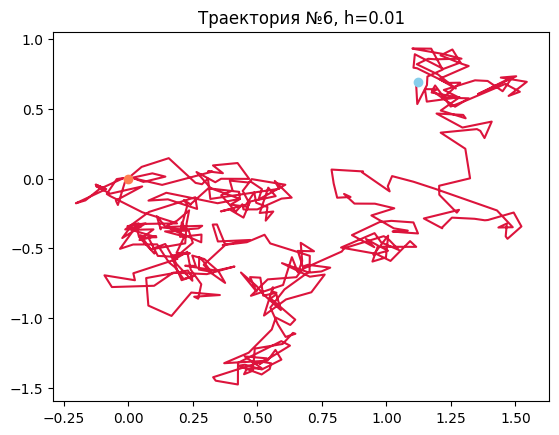

In [ ]:
h /= 2
viz(W2, 1, "crimson")
viz(W2, 2, "crimson")
viz(W2, 3, "crimson")
viz(W2, 4, "crimson")
viz(W2, 5, "crimson")
viz(W2, 6, "crimson")

In [ ]:
# Вычисление характеристик двумерного винеровского процесса

# Вариации компонент
VAR = []
for i in range(n):
  var1 = 0  
  var2 = 0
  for j in range(N2):
        var1 += abs(W2[i][0][j + 1] - W2[i][0][j])
        var2 += abs(W2[i][1][j + 1] - W2[i][1][j])
  VAR.append((var1, var2))

print("Вариации компонент для каждой траектории: ")

for i in range(3):
    print(f"({VAR[i][0]}, {VAR[i][1]})")
print("...")
for i in range(len(VAR) - 1, len(VAR) - 4, -1):
    print(f"({VAR[i][0]}, {VAR[i][1]})")

# Среднее значение вариации
sum_x = 0
sum_y = 0
for i in range(len(VAR)):
  sum_x += VAR[i][0]
  sum_y += VAR[i][1]
print()
print("Среднее значение вариации: ")
print(f"({sum_x / len(VAR)}, {sum_y / len(VAR)})")

# Суммы квадратов приращений компонент
sqVAR = []
for i in range(n):
  sqvar1 = 0
  sqvar2 = 0
  for j in range(N2):
        sqvar1 += abs(W2[i][0][j + 1] - W2[i][0][j]) ** 2
        sqvar2 += abs(W2[i][1][j + 1] - W2[i][1][j]) ** 2
  sqVAR.append((sqvar1, sqvar2))
print()
print("Суммы квадратов приращений компонент: ")

for i in range(3):
    print(f"({sqVAR[i][0]}, {sqVAR[i][1]})")
print("...")
for i in range(len(sqVAR) - 1, len(sqVAR) - 4, -1):
    print(f"({sqVAR[i][0]}, {sqVAR[i][1]})")

# Среднее значение этих сумм
sum_x = 0
sum_y = 0
for i in range(len(sqVAR)):
  sum_x += sqVAR[i][0]
  sum_y += sqVAR[i][1]
print()
print("Среднее значение этих сумм: ")
print(f"({sum_x / len(sqVAR)}, {sum_y / len(sqVAR)})")

Вариации компонент для каждой траектории: 
(24.780045977457206, 25.0896180039057)
(25.37474196254758, 24.444582078452463)
(22.476960414243642, 24.596742367330705)
...
(22.607132698964683, 23.227121056188853)
(24.854209592377018, 24.6410604944664)
(24.506371881916593, 24.534872955171117)

Среднее значение вариации: 
(23.89030816810702, 23.945036425318474)

Суммы квадратов приращений компонент: 
(2.4543356171246113, 2.4274103168239853)
(2.467273103972224, 2.2545758409610928)
(2.006485350810821, 2.4233339319075107)
...
(2.026272208175552, 2.058604317515368)
(2.489768362368718, 2.3277702266607383)
(2.377064194752589, 2.4109915581847066)

Среднее значение этих сумм: 
(2.2445313415907844, 2.2483257363287477)


In [ ]:
# Вычисление вероятности
sum = 0
for i in range(n):
  if np.sqrt(W2[i][0][-1] ** 2 + W2[i][1][-1] ** 2) >= z: 
    sum += 1
print("Эмпирическая вероятность: ")
print(sum / n)

Эмпирическая вероятность: 
0.21875


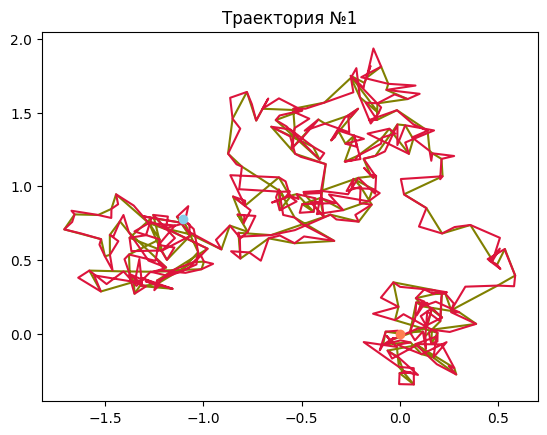

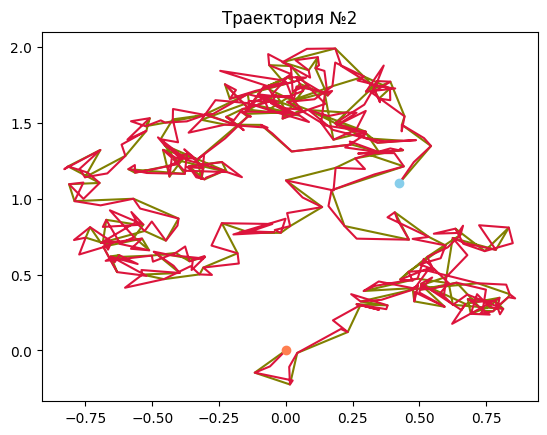

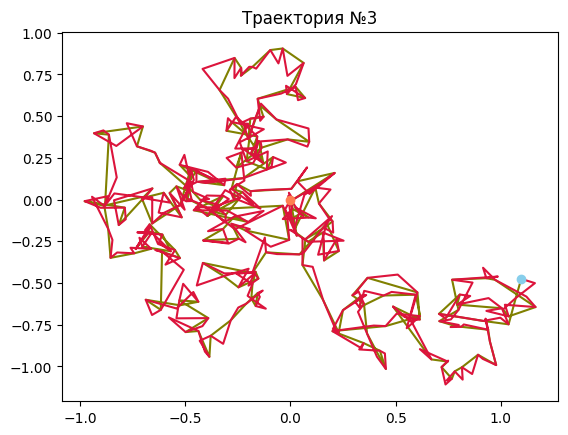

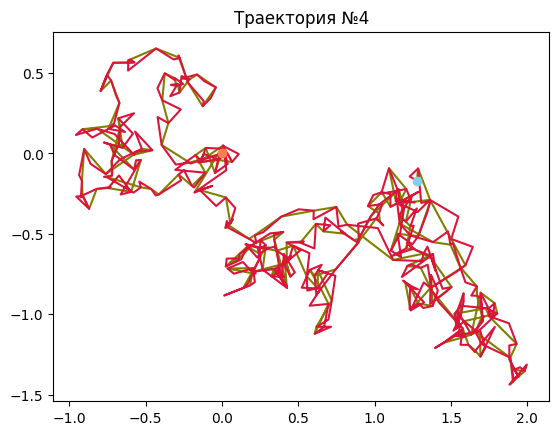

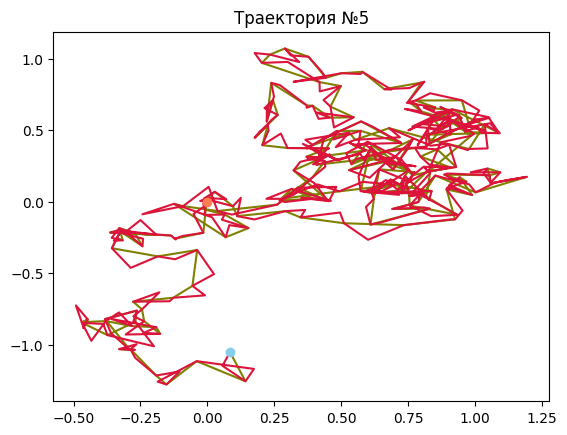

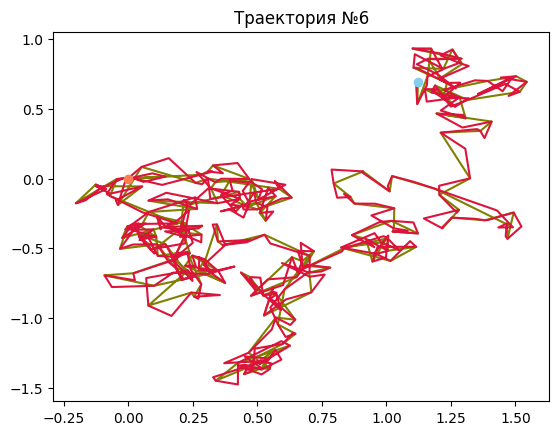

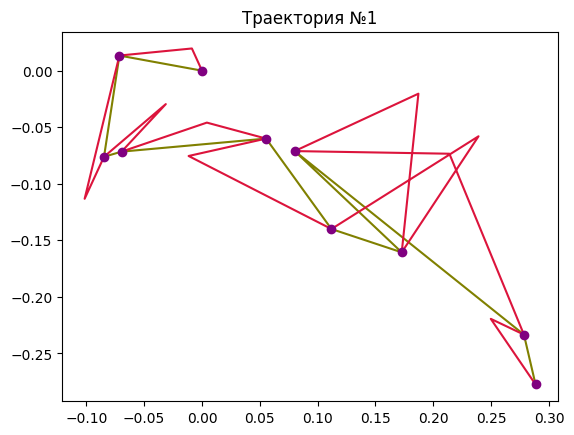

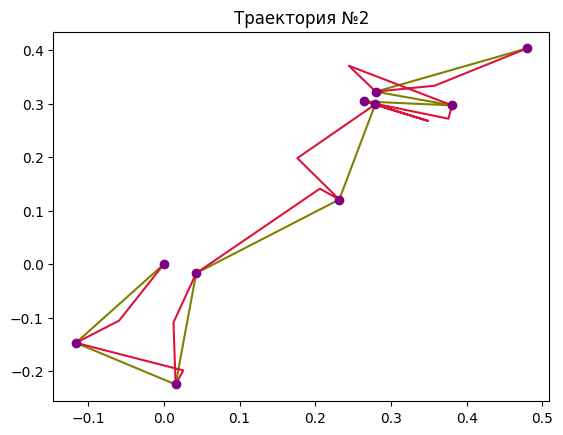

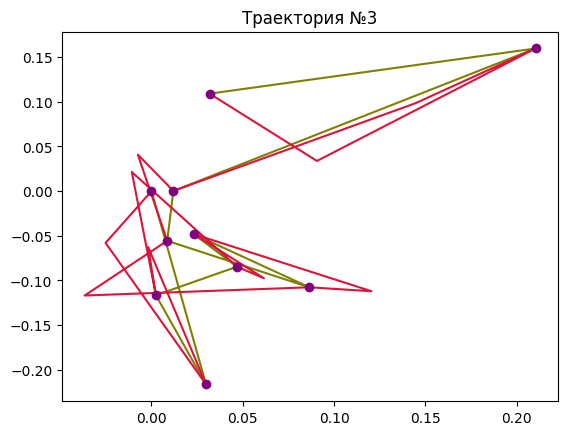

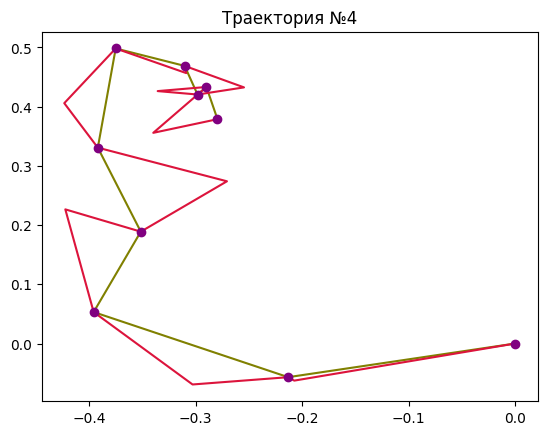

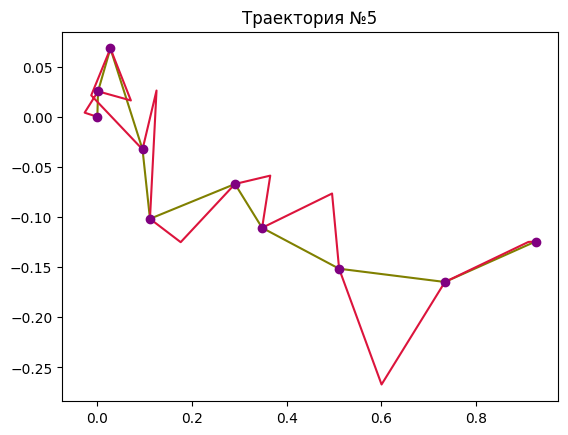

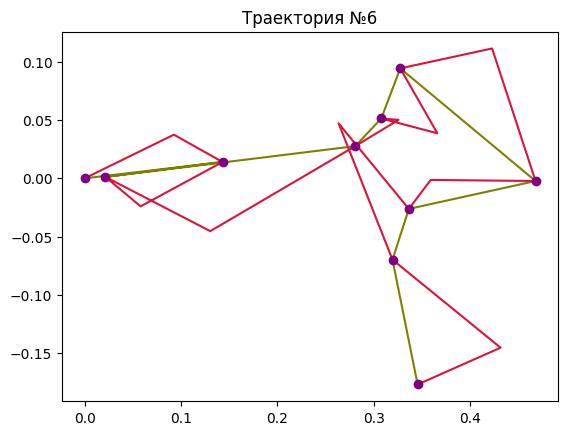

In [ ]:
# Совместная визуализация траекторий
def soviz(W_1, W_2, num, col_1 = 'olive', col_2 = 'crimson'):
  plt.scatter(W_1[num - 1][0][0], W_1[num - 1][1][0], zorder=2, color = "coral")
  plt.scatter(W_1[num - 1][0][-1], W_1[num - 1][1][-1], zorder=2, color = "skyblue")
  plt.plot(W_1[num - 1][0], W_1[num - 1][1], color=col_1, zorder=1)
  plt.plot(W_2[num - 1][0], W_2[num - 1][1], color=col_2, zorder=1)
  plt.title(f"Траектория №{num}")
  plt.show()
def sovizdetail(x, W_1, W_2, num, col_1 = 'olive', col_2 = 'crimson'):
  plt.plot(W_1[num - 1][0][:x], W_1[num - 1][1][:x], color=col_1, zorder=1)
  plt.plot(W_2[num - 1][0][:2 * x - 1], W_2[num - 1][1][:2 * x - 1], color=col_2, zorder=1)
  for i in range(x):
    plt.scatter(W_1[num - 1][0][i], W_1[num - 1][1][i], zorder=2, color = "purple")
  plt.title(f"Траектория №{num}")
  plt.show()
soviz(W1, W2, 1)
soviz(W1, W2, 2)
soviz(W1, W2, 3)
soviz(W1, W2, 4)
soviz(W1, W2, 5)
soviz(W1, W2, 6)
sovizdetail(10, W1, W2, 1)
sovizdetail(10, W1, W2, 2)
sovizdetail(10, W1, W2, 3)
sovizdetail(10, W1, W2, 4)
sovizdetail(10, W1, W2, 5)
sovizdetail(10, W1, W2, 6)

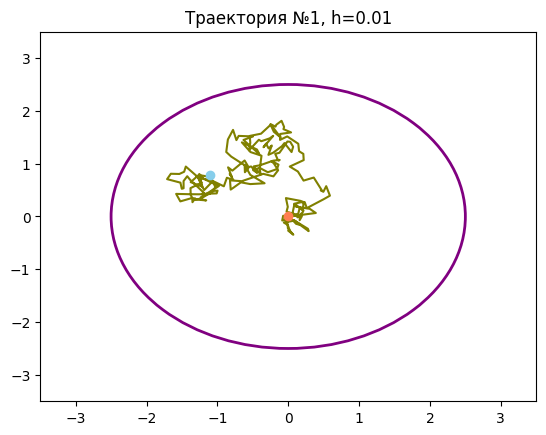

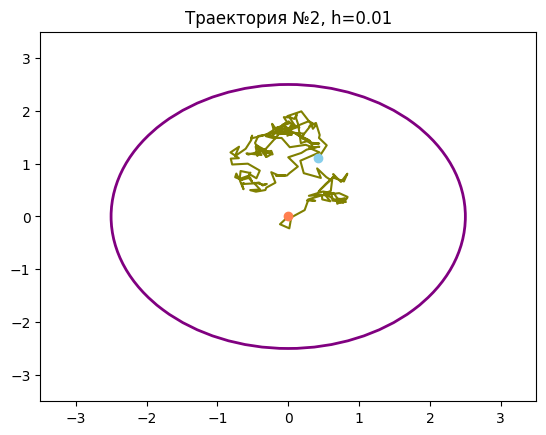

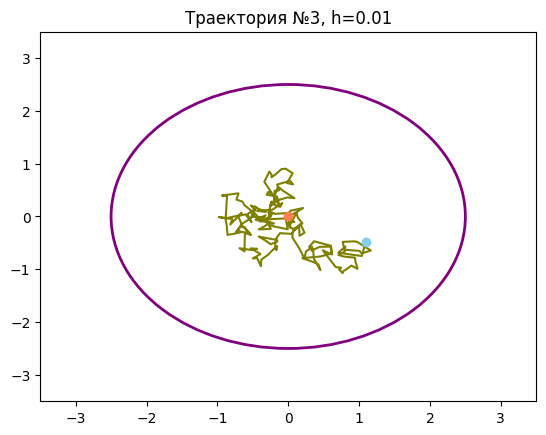

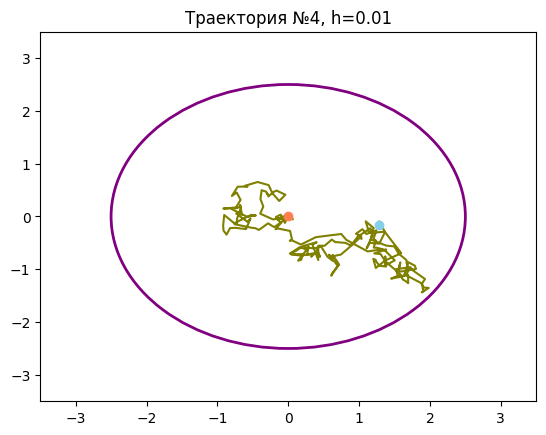

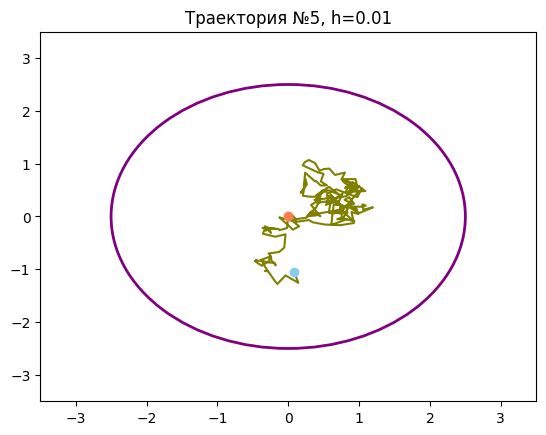

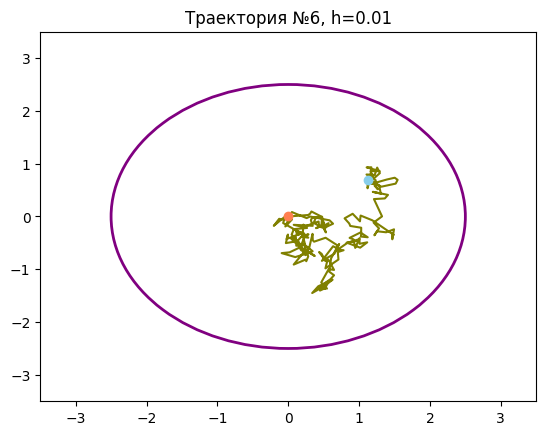

In [ ]:
# не надо это списывать :)

def circleviz(W, num, z, col = 'olive'):
  plt.scatter(W[num - 1][0][0], W[num - 1][1][0], zorder=2, color = "coral")
  plt.scatter(W[num - 1][0][-1], W[num - 1][1][-1], zorder=2, color = "skyblue")
  plt.plot(W[num - 1][0], W[num - 1][1], color=col, zorder=1)
  plt.title(f"Траектория №{num}, h={h}")
  c = plt.Circle ((0, 0), radius = z, fill = False, color = "purple", linewidth = 2)
  plt.gca ().add_artist (c)
  plt.xlim([-z - 1, z + 1])
  plt.ylim([-z - 1, z + 1])
  plt.show()
circleviz(W1, 1, z)
circleviz(W1, 2, z)
circleviz(W1, 3, z)
circleviz(W1, 4, z)
circleviz(W1, 5, z)
circleviz(W1, 6, z)

KeyboardInterrupt: ignored

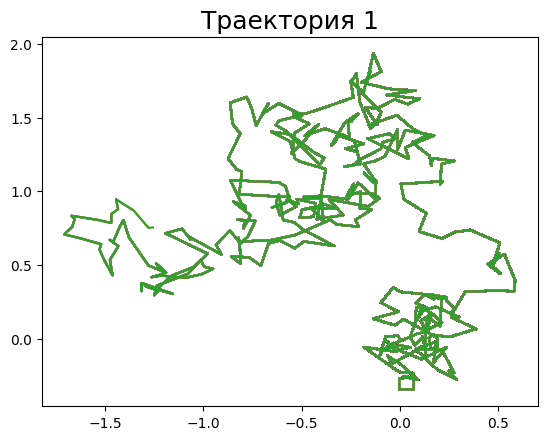

In [ ]:
# и вот это вот тоже не надо :)
fig,ax = plt.subplots()
ax.set_title(f'Траектория {track}', fontsize = 18)
x = []
y = []
def animate(i):
    x.append(W2[track - 1][0][i])
    y.append(W2[track - 1][1][i])
    ax.plot(x,y)
anim = animation.FuncAnimation(fig, animate,  frames = N2, interval = N2)
anim.save(os.getcwd() + '/anim_tsp.gif', fps = 5, writer = 'pillow')